In [ ]:
# In this notebook we will use matplotlib to graph tweets overtime, calculate the number of days tweeted
# over the period, extract unique hashtags, and create a word cloud of most used words from tweets

In [19]:
# Install wordcloud
!pip3 install wordcloud

from datetime import date, timedelta
import twint
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nest_asyncio
nest_asyncio.apply()

In [6]:
# Simple config. Searching user jack (founder of Twitter) tweets over a 1 month period Feb 17th 2021 - Mar 17 2021.
# c.Panda = True creates a pandas dataframe using the data.
# see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html for more.
c = twint.Config()

c.Username = 'jack'
c.Since = '2021-02-17 00:00:00'
c.Until = '2021-03-17 00:00:00'
c.Pandas = True

twint.run.Search(c)

1371614057338376193 2021-03-16 00:07:29 +0000 <jack> Congratulations, ⁦@Beyonce⁩!    https://t.co/EJ6hJx3RcN
1371311044988129286 2021-03-15 04:03:25 +0000 <jack>  https://t.co/Y9EVV5g4ah
1371310938830295042 2021-03-15 04:03:00 +0000 <jack>  https://t.co/tHaHqYnlpA
1371309188828258310 2021-03-15 03:56:02 +0000 <jack>  https://t.co/2ed0k6DE4s
1369470230221688834 2021-03-10 02:08:41 +0000 <jack> @aismallard @GiveDirectly No
1369326373035245581 2021-03-09 16:37:02 +0000 <jack> Ending this March 21st  Will immediately convert proceeds to #Bitcoin  And send to @GiveDirectly Africa Response
1368138061276659713 2021-03-06 09:55:07 +0000 <jack> @ConorOkus 💯
1368129370141974529 2021-03-06 09:20:35 +0000 <jack> This bag is ♾ 🧡  https://t.co/wT8NXL5tqt
1368129072073695232 2021-03-06 09:19:24 +0000 <jack> Matt is incredible 🧡
1367990471759306752 2021-03-06 00:08:39 +0000 <jack>  https://t.co/xCnWG9EqgD
1367460924399882241 2021-03-04 13:04:25 +0000 <jack> More from us soon. In the meantime, here’s a

In [7]:
# Assign the dataframe created by 'c.Panda = True' to a variable and view
df = twint.storage.panda.Tweets_df
df

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1371614057338376193,1371614057338376193,1.615853e+12,2021-03-16 00:07:29,+0000,,"Congratulations, ⁦@Beyonce⁩! https://t.co/E...",en,[],[],...,,,,,,[],,,,
1,1371311044988129286,1371311044988129286,1.615781e+12,2021-03-15 04:03:25,+0000,,https://t.co/Y9EVV5g4ah,und,[],[],...,,,,,,[],,,,
2,1371310938830295042,1371310938830295042,1.615781e+12,2021-03-15 04:03:00,+0000,,https://t.co/tHaHqYnlpA,und,[],[],...,,,,,,[],,,,
3,1371309188828258310,1371309188828258310,1.615781e+12,2021-03-15 03:56:02,+0000,,https://t.co/2ed0k6DE4s,und,[],[],...,,,,,,[],,,,
4,1369470230221688834,1367990471759306752,1.615342e+12,2021-03-10 02:08:41,+0000,,@aismallard @GiveDirectly No,und,[],[],...,,,,,,"[{'screen_name': 'aismallard', 'name': 'aismal...",,,,
5,1369326373035245581,1367990471759306752,1.615308e+12,2021-03-09 16:37:02,+0000,,Ending this March 21st Will immediately conve...,en,[bitcoin],[],...,,,,,,[],,,,
6,1368138061276659713,1368137533599723521,1.615025e+12,2021-03-06 09:55:07,+0000,,@ConorOkus 💯,und,[],[],...,,,,,,"[{'screen_name': 'ConorOkus', 'name': 'Conor O...",,,,
7,1368129370141974529,1368129370141974529,1.615022e+12,2021-03-06 09:20:35,+0000,,This bag is ♾ 🧡 https://t.co/wT8NXL5tqt,en,[],[],...,,,,,,[],,,,
8,1368129072073695232,1368129072073695232,1.615022e+12,2021-03-06 09:19:24,+0000,,Matt is incredible 🧡,en,[],[],...,,,,,,[],,,,
9,1367990471759306752,1367990471759306752,1.614989e+12,2021-03-06 00:08:39,+0000,,https://t.co/xCnWG9EqgD,und,[],[],...,,,,,,[],,,,


In [8]:
# Convert date colum into a list for the next step
dates_list = df['date'].to_list()

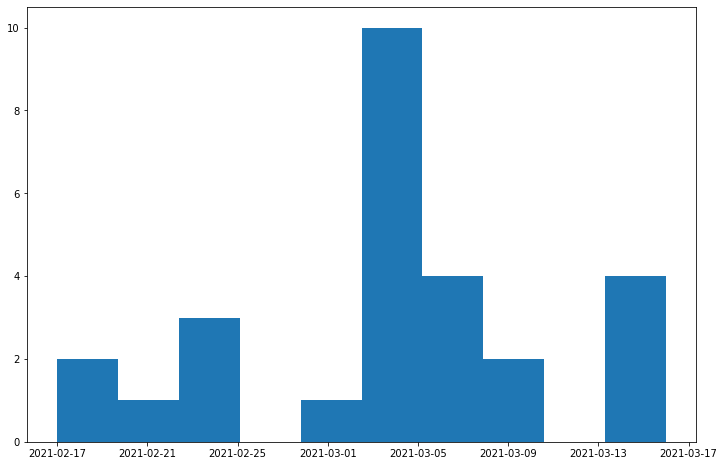

In [9]:
# Create a histogram of tweet frequency
# from https://stackoverflow.com/questions/44929555/how-to-properly-create-a-histogram-displaying-the-frequency-of-the-tweets-for-e

dates = []
for t in dates_list:
    # extract the date part of the datetime
    date_str = t.split(' ')[0]
    # extract the time from the date
    year,month,day = [int(i) for i in date_str.split('-')]
    # create a date object
    d = date(year, month, day)
    # sort
    dates.append(d)
    
# sort dates
dates.sort()

# find the first and last date
min_date = dates[0]
max_date = dates[-1]

# compute num days
length = (max_date - min_date).days + 1

# plot histogram
plt.figure(figsize=(12,8))
plt.hist(dates)
plt.show()

In [10]:
# Calcuate how many days jack has tweeted during the period collected
df['date_only'] = pd.to_datetime(df['date'])
date_only = df['date_only'].dt.date
num_days = len(date_only.unique())
print("Number of days jack has tweeted:", num_days)

Number of days jack has tweeted: 14


In [11]:
# Extract unique hashtags
# Get hashtag list
hashtag_list = df['hashtags'].to_list()

# Remove empty elements
filtered_list = list(filter(None, hashtag_list))

# Find unique entries (will be slow with *very* large lists)
unique_hashtags = []
for value in filtered_list:
    if value not in unique_hashtags:
        unique_hashtags.append(value)

# In this case, we only have one unique hashtag
print(unique_hashtags)

[['bitcoin']]


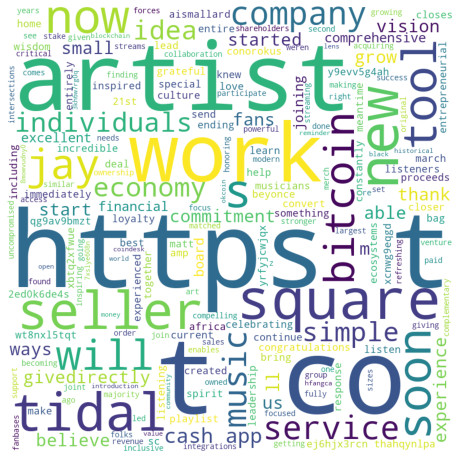

In [26]:
# Create a word cloud for tweets collected, may take sometime
tweets = df['tweet'].to_list()

words = ''
stopwords = set(STOPWORDS)

# Iterate through tweets
for value in tweets:
    # Convert to string
    value = str(value)
    # Tokenize
    tokens = value.split()
    # Convert each to lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    # Add to word
    words += " ".join(tokens)+" "

# Word cloud setup
wordcloud = WordCloud(width = 800, height = 800,
                     background_color = 'white',
                     stopwords = stopwords,
                     min_font_size = 10).generate(words)

# Plot
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# This concludes basic analysis with TWINT.

# I have no affiliation with TWINT. Please consider supporting the project through patreon.